# Daily, Hourly, and Monthly Average Plots
NOTE: This notebook is using the output from the public_readability notebook. 

### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import pandas as pd
import pytz
from importlib import reload

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Written Import statements
from modules import dataframe_manip as dfm
from modules import misc, schemas, College1AcPtTimeSeries
# The reload() function is needed to update modules after
# changes are made to their files.
dfm = reload(dfm)
misc = reload(misc)
schemas = reload(schemas)
College1AcPtTimeSeries = reload(College1AcPtTimeSeries)

### Constant Variables

In [2]:
filepath = 'sample_data.csv'

# Lists to help order plots
order_day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
order_mon = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct","Nov","Dec"]

### Configurable Variables

In [3]:
timezone = pytz.timezone('US/Pacific')

all_buildings = [
    'BUILDING00','BUILDING01','BUILDING02','BUILDING03','BUILDING04',
    'BUILDING05','BUILDING06','BUILDING07','BUILDING08','BUILDING09',
    'BUILDING10','BUILDING11','BUILDING12','BUILDING13','BUILDING14',
    'BUILDING15','BUILDING16','BUILDING17','BUILDING18','BUILDING19',
    'BUILDING20','BUILDING21','BUILDING22','BUILDING23','BUILDING24',
    'BUILDING25','BUILDING26','BUILDING27','BUILDING28','BUILDING29',
    'BUILDING30','BUILDING31','BUILDING32','BUILDING33','BUILDING34',
    'BUILDING35','BUILDING36','BUILDING37','BUILDING38','BUILDING39',
    'BUILDING40','BUILDING41','BUILDING42','BUILDING43','BUILDING44',
    'BUILDING45','BUILDING46','BUILDING47','BUILDING48','BUILDING49',
    'BUILDING50','BUILDING51'
]
building_list = ['BUILDING16','BUILDING19','BUILDING30','BUILDING42','BUILDING49']
building_name = 'BUILDING16'

### Main Function

In [4]:
def get_average_plots(df,building_name):
    building_ap = dfm.get_building_accesspoints(list(df.columns), building_name)
    
    daily_df = df[building_ap].resample('D').mean()
    daily_df['total'] = daily_df.sum(axis=1)
    daily_df.drop(building_ap, axis=1, inplace=True)
    daily_df = daily_df.groupby(daily_df.index.weekday_name).mean()
    daily_df['day'] = list(daily_df.index)

    hourly_df = df[building_ap].resample('H').mean()
    hourly_df['total'] = hourly_df.sum(axis=1)
    hourly_df.drop(building_ap, axis=1, inplace=True)
    hourly_df = hourly_df.groupby(hourly_df.index.hour).mean()
    hourly_df['hour'] = list(hourly_df.index)

    monthly_df = df[building_ap].resample('M').mean()
    monthly_df['total'] = monthly_df.sum(axis=1)
    monthly_df.drop(building_ap, axis=1, inplace=True)
    monthly_df['month'] = list(monthly_df.index.strftime('%B'))
    
    # Create 1x3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,8))

    ax2.set_title(building_name,fontsize=50) #################

    sns.barplot(x='day', y="total", data=daily_df, ax=ax1)#, order=order_day)

    sns.barplot(x="hour", y="total", data=hourly_df, ax=ax2)
    plt.setp(ax2.get_xticklabels(), rotation=45)
    ax2.set_ylabel("")  # remove y label, but keep ticks


    sns.barplot(x='month', y="total", data=monthly_df, ax=ax3)#, order=order_mon)
    plt.setp(ax3.get_xticklabels(), rotation=45)
    ax3.set_ylabel("")  # remove y label, but keep ticks

    fig.tight_layout()

    plt.show()

## Code starts here

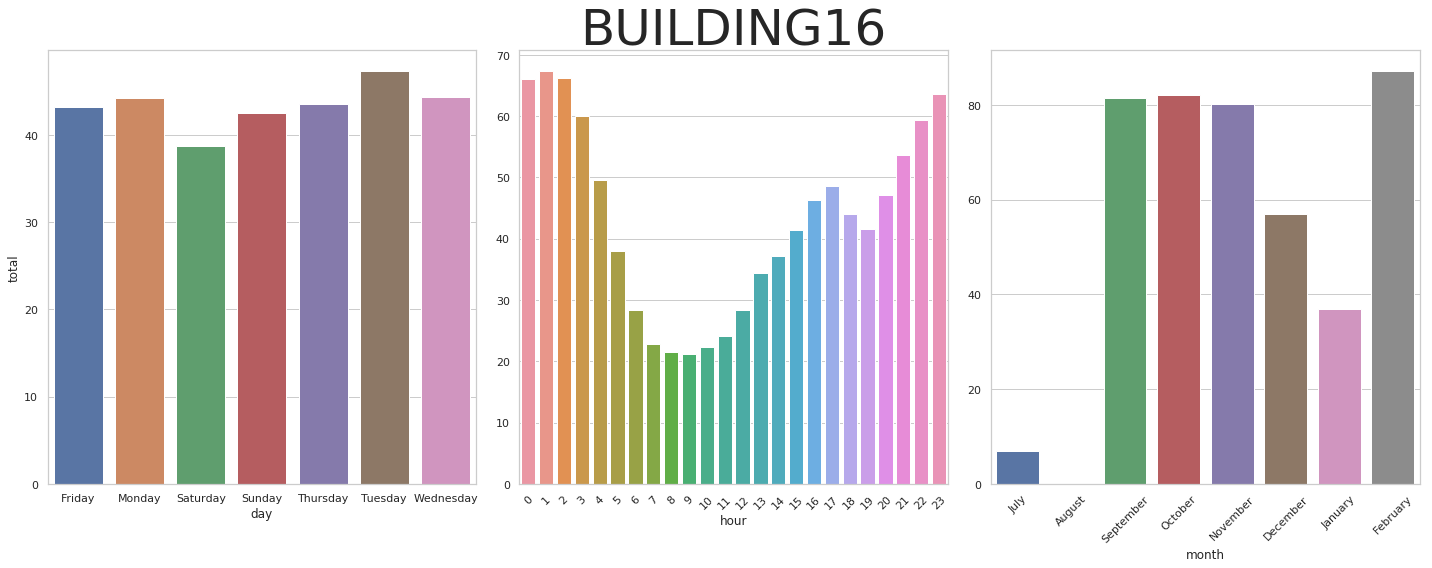

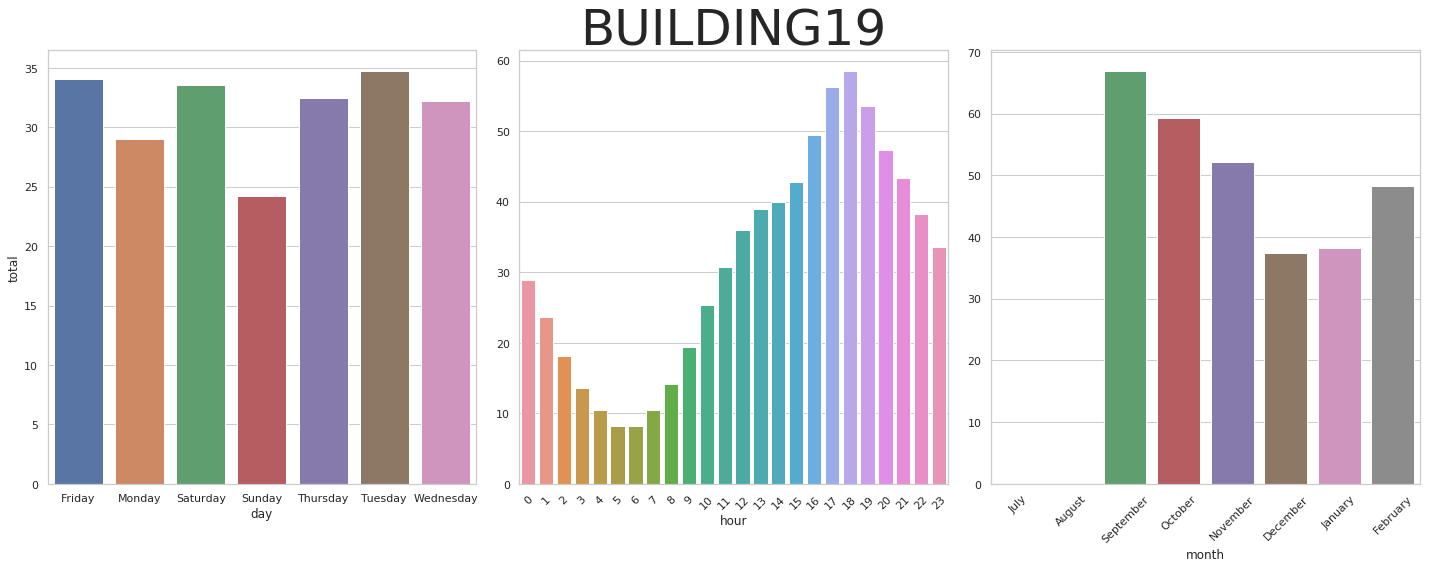

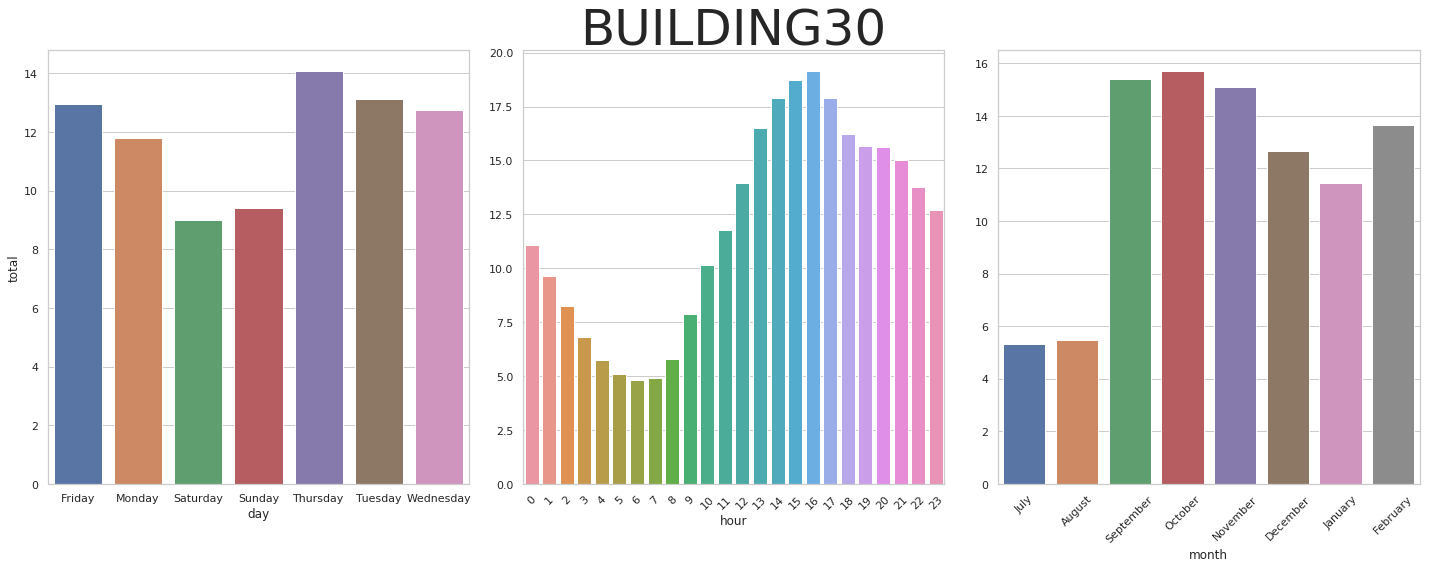

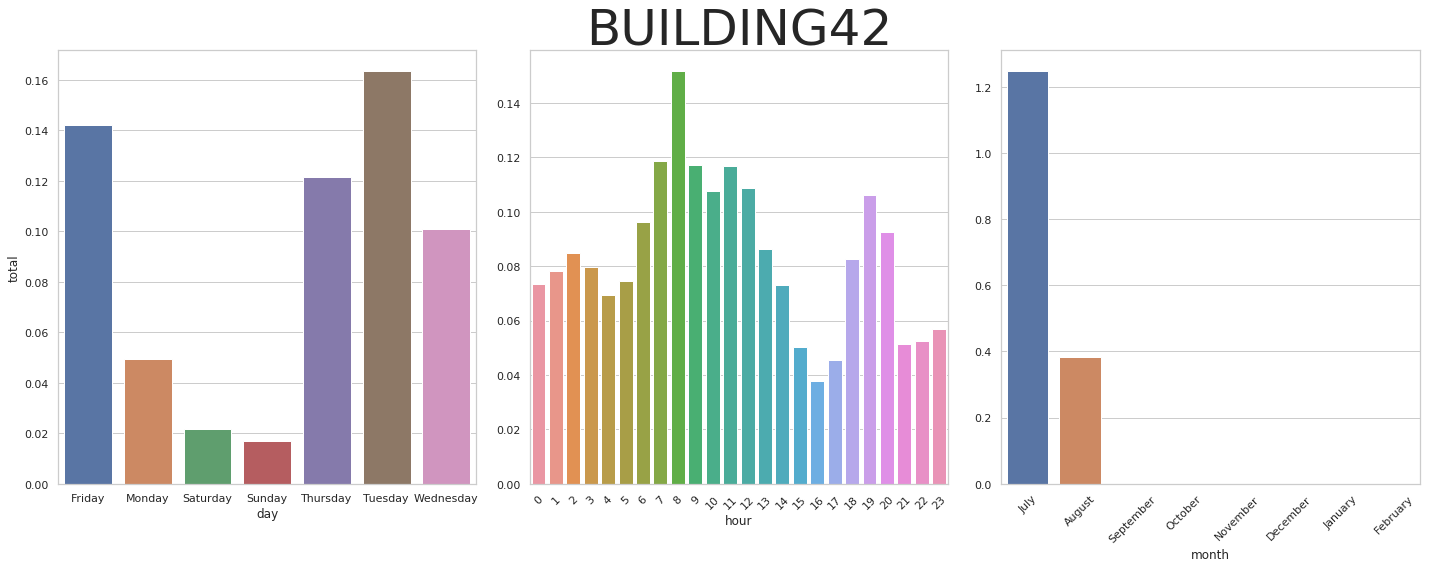

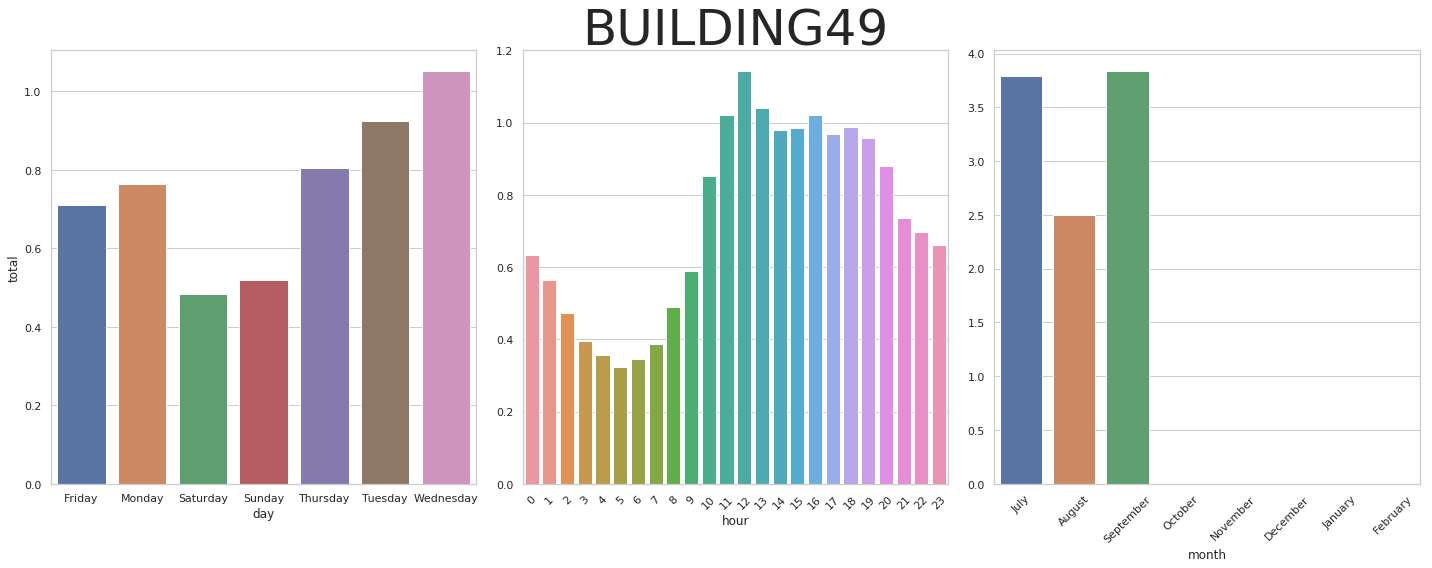

In [7]:
df = dfm.csv_to_timeseries_df(filepath=filepath, timezone=timezone)
df = dfm.fill_intervening_nas(df)
for x in building_list:
    get_average_plots(df,x)